## Import Dependencies

In [25]:
# A Jupyter Notebook magic command that enables the rendering of Matplotlib plots directly within the notebook interface.
%matplotlib inline

# provides a collection of functions that allow you to create and customize plots.
import matplotlib.pyplot as plt

# provides various predefined styles for customizing the appearance of plots.
from matplotlib import style

# emulates the visual style of the plots often seen on the (https://fivethirtyeight.com/) website.
style.use('fivethirtyeight')

# A library for numerical computing in Python.
import numpy as np

# A library for data manipulation and analysis. 
import pandas as pd

# A module rom the Python Standard Library that provides classes for manipulating dates and times in Python.
from datetime import datetime as dt, timedelta

# The Python SQL library and modules toolkit including the Object Relational Mapper:

# A module that provides the core functionality for working with databases.
import sqlalchemy

# A function that creates a new base class for declarative class definitions. It is used to reflect database tables into Python classes.
from sqlalchemy.ext.automap import automap_base

# A class that represents a database session and provides an interface for interacting with the database.
from sqlalchemy.orm import Session

# Functions for creating a database engine and using SQL functions in queries, respectively.
from sqlalchemy import create_engine, func

# Reflect Tables into SQLAlchemy ORM

In [26]:
# Provide the absolute file path to hawaii.sqlite
database_path = "Resources/hawaii.sqlite"

# create engine to hawaii.sqlite
engine = create_engine(f"sqlite:///{database_path}")

In [27]:
# Reflect an existing database into a new model
Base = automap_base()

# Reflect the tables
Base.prepare(engine, reflect=True)

/var/folders/2h/v467wz0562dfskh2fgt2pqhm0000gn/T/ipykernel_79132/631302914.py:5: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [28]:
# View all of the classes that automap found
classes = Base.classes

# Get the table names
table_names = classes.keys()

# Print the table names
for table_name in table_names:
    print(table_name)

station
measurement


In [29]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [30]:
# Creates the session (link) from Python to the DB
session = Session(engine)

# Uses a query to retrieve data and stores it in a list datatype object
measurement_results = session.query(Measurement).all()

# Converts the returned data to a dataframe datatype object
df_measurement = pd.DataFrame([{'prcp': r.prcp, 'id': r.id, 'station': r.station, 'date': r.date, 'tobs': r.tobs} for r in measurement_results])

# displays the dataframe
df_measurement

,prcp,id,station,date,tobs
0,0.08,1,USC00519397,2010-01-01,65.0
1,0.00,2,USC00519397,2010-01-02,63.0
2,0.00,3,USC00519397,2010-01-03,74.0
3,0.00,4,USC00519397,2010-01-04,76.0
4,NaN,5,USC00519397,2010-01-06,73.0
...,...,...,...,...,...
19545,0.09,19546,USC00516128,2017-08-19,71.0
19546,NaN,19547,USC00516128,2017-08-20,78.0
19547,0.56,19548,USC00516128,2017-08-21,76.0
19548,0.50,19549,USC00516128,2017-08-22,76.0


# Exploratory Precipitation Analysis

In [31]:
# Find the most recent date in the data set.
# Convert df.date column to datetime type
df_measurement['date'] = pd.to_datetime(df_measurement['date'])

# Find the most recent date in the data set
most_recent_date = session.query(func.max(Measurement.date)).scalar()

# Print the most recent date
print(most_recent_date)

2017-08-23


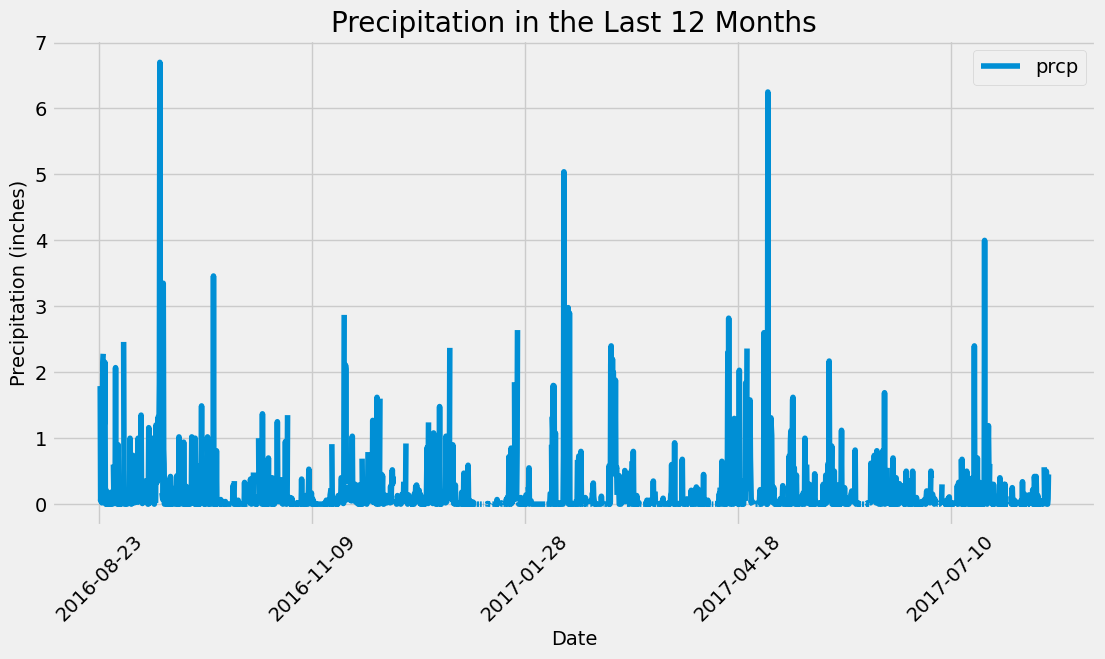

In [32]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Convert the most_recent_date object datatype from String to DateTime
most_recent_date = pd.to_datetime(most_recent_date)

# Calculate the date one year from the last date in the dataset.
one_year_ago = most_recent_date - pd.DateOffset(years=1)

# Creates a new variable, one_year_ago_str, with datatype = string based on the one_year_ago variable with datatype DateTime.
one_year_ago_str = one_year_ago.strftime('%Y-%m-%d')

# Performs a query to retrieve the date and precipitation scores
precipitation_results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_ago_str).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df_precipitation = pd.DataFrame(precipitation_results, columns=['date', 'prcp'])
df_precipitation.set_index('date', inplace=True)

# Sorts the dataframe by date
df_precipitation.sort_index(inplace=True)

#  Pandas Plotting with Matplotlib used to plot the data
df_precipitation.plot(y='prcp', figsize=(12, 6))
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.title('Precipitation in the Last 12 Months')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()


In [33]:
# Convert query results to a DataFrame
df_precipiation = pd.DataFrame(precipitation_results, columns=['date', 'prcp'])

# Calculate summary statistics
summary_stats = df_precipitation['prcp'].describe()

# Show the summary statistics for the precipitation data
print(summary_stats)

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64


# Exploratory Station Analysis

In [34]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query(func.count(Station.station.distinct())).scalar()
# This also works:
# total_stations = session.query(func.count(Measurement.station.distinct())).scalar()

# Show the total number of stations
print(total_stations)

9


In [35]:
# List the stations and the counts in descending order and find the most active stations
active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

# Show the stations and their respective observation counts in descending order
for station, count in active_stations:
    print(f"Station [{station}] has {count} observation counts")
    
# Show the most active station
print(f"\n The most active station is Station {active_stations[0]}.")

Station [USC00519281] has 2772 observation counts
Station [USC00519397] has 2724 observation counts
Station [USC00513117] has 2709 observation counts
Station [USC00519523] has 2669 observation counts
Station [USC00516128] has 2612 observation counts
Station [USC00514830] has 2202 observation counts
Station [USC00511918] has 1979 observation counts
Station [USC00517948] has 1372 observation counts
Station [USC00518838] has 511 observation counts

 The most active station is Station ('USC00519281', 2772).


In [36]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# Query to find the  most active station
most_active_station = session.query(Measurement.station).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).\
    first()

# Retrieve the station ID (This is called unpacking the tuple)
most_active_station_id = most_active_station[0]

# Query which calculates the lowest, highest, and average temperature for the most active station
temperature_stats = session.query(func.min(Measurement.tobs),
                                  func.max(Measurement.tobs),
                                  func.avg(Measurement.tobs)).\
    filter(Measurement.station == most_active_station_id).\
    first()

# Retrieve the temperature statistics (this is caleld unpacking the tuple)
lowest_temp = temperature_stats[0]
highest_temp = temperature_stats[1]
avg_temp = temperature_stats[2]

# Print the temperature statistics
print(f"Lowest Temperature: {lowest_temp} \u00b0F")
print(f"Highest Temperature: {highest_temp} \u00b0F")
print(f"Average Temperature: {avg_temp} \u00b0F")


Lowest Temperature: 54.0 °F
Highest Temperature: 85.0 °F
Average Temperature: 71.66378066378067 °F


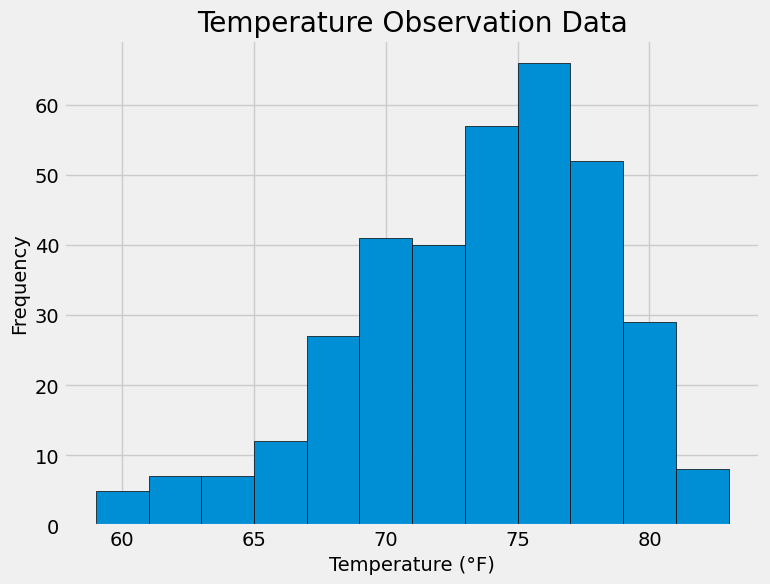

In [37]:
# Determine the most active station
most_active_station = session.query(Measurement.station)\
    .group_by(Measurement.station)\
    .order_by(func.count(Measurement.station).desc())\
    .first()

# Calculate the date 12 months ago
most_recent_date = session.query(Measurement.date)\
    .order_by(Measurement.date.desc())\
    .first()

# Find the most recent date and a date one year prior
most_recent_date = dt.strptime(most_recent_date[0], "%Y-%m-%d")
one_year_ago = most_recent_date - timedelta(days=365)

# Query the last 12 months of temperature observation  (tobs)data for the most active station
temperature_results = session.query(Measurement.date, Measurement.tobs)\
    .filter(Measurement.station == most_active_station[0])\
    .filter(Measurement.date >= one_year_ago)\
    .order_by(Measurement.date.desc())\
    .all()

# Create a DataFrame from the query results
df_station_analysis = pd.DataFrame(temperature_results, columns=['date', 'tobs'])

# Plot the results as a histogram
plt.figure(figsize=(8, 6))
plt.hist(df_station_analysis['tobs'], bins=12, edgecolor='black')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.title('Temperature Observation Data')
plt.grid(True)
plt.show()


# Close session

In [38]:
# Close Session
session.close()